# Czynniki ryzyka chorób sercowo-naczyniowych:
# analiza danych demograficznych i zdrowotnych

---

### Wstęp:
#### Choroba serca jest złożonym procesem, na który wpływ ma wiele czynników zdrowotnych oraz demograficznych. Podczas analizy poniższego zbioru danych skupię się na kluczowych determinantach ryzyka oraz relacji między nimi. Może to pomóc lepiej zrozumieć, jak poszczególne czynniki mogą mieć znaczenie dla zdrowia serca i jakie wnioski można wyciągnąć, aby promować zdrowszy styl życia.

### Cel analizy:
#### Badanie czynników ryzyka chorób serca w kontekście demografii i nawyków zdrowotnych


### Źródło danych: 
#### [https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease](url)

### Opis danych:

#### Dane pochodzą z amerykańskiego systemu Behavioral Risk Factor Surveillance System (BRFSS), który jest największym globalnym programem ankiet telefonicznych badających stan zdrowia populacji. Zostały one zebrane i udostępnione przez Centers for Disease Control and Prevention (CDC) jako część corocznego monitorowania zdrowia mieszkańców Stanów Zjednoczonych. Analizowany zbiór danych obejmuje rok 2020.
#### Analizowany zbiór danych zawiera zmienne dotyczące stylu życia, nawyków zdrowotnych i cech demograficznych, które pozwalają na zbadanie ryzyka chorób serca

#### Opis wszystkich kolumn ze zbioru danych (pogrubione - wartości użyte w analizie):

- **HeartDisease - Czy u badanej osoby zdiagnozowano chorobę serca? (Yes / No)**
- **BMI	- Wskaźnik masy ciała (Body Mass Index)**
- **Smoking	- Czy badana osoba jest osobą palącą? (Yes / No)**
- AlcoholDrinking	- Czy u badanej osoby występuje nadmierne spożycie alkoholu? (Yes / No) (mężczyźni > 5 drinków miesięcznie, kobiety 4)
- Stroke - Czy u badanej osoby wystąpił udar? (Yes / No)
- PhysicalHealth	- Liczba dni w ciągu ostatniego miesiąca, w których występowały problemy zdrowotne fizyczne (np. ból, choroba).
- MentalHealth	- Liczba dni w ciągu ostatniego miesiąca, w których występowały problemy zdrowotne psychiczne (np. depresja, stres, lęki).
- DiffWalking	- Czy u badanej osoby występują trudności z chodzeniem lub poruszaniem się? (Yes / No)
- **Sex	- Płeć badanej osoby (Male / Female).**
- **AgeCategory	- Kategoria wiekowa (np. 18-24, 25-29, ..., 80 or older).**
- Race	- Rasa lub grupa etniczna (White, Black, Asian, American Indian/Alaskan Native, Hispanic, Other).
- Diabetic	- Czy u badanej osoby zdiagnozowano cukrzycę? (Yes / No)
- PhysicalActivity	- Czy u badanej osoby występuje regularna aktywność fizyczna? (Yes / No)
- GenHealth	- Samoocena ogólnego stanu zdrowia (Excellent, Very good, Good, Fair, Poor).
- SleepTime	- Średnia liczba godzin snu na dobę.
- Asthma	- Czy u badanej osoby zdiagnozowano astmę? (Yes / No)
- KidneyDisease	- Czy u badanej osoby przewlekłą chorobę nerek? (Yes / No)
- SkinCancer	- Czy u badanej osoby zdiagnozowano raka skóry? (Yes / No)

---

### Pobranie bibliotek

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Pobranie i załadowanie danych

In [13]:
csv_path = 'data/heart_2020_cleaned.csv'
if not os.path.exists(csv_path):
    raise FileNotFoundError(f'Dataset not found at {csv_path}')

df = pd.read_csv(csv_path)
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


---

### Struktura i typ danych 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

---

### Wstępne czyszczenie danych

#### 1) brak wartości NULL w zbiorze danych.

#### 2) usunięcie nierealnej wartości SleepTime = 24h


In [15]:
df = df[df["SleepTime"] != 24]

df.head(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


---

### Agregacje i wizualizacje

#### 1) Wykres kołowy: Podział badanej populacji ze względu na płeć

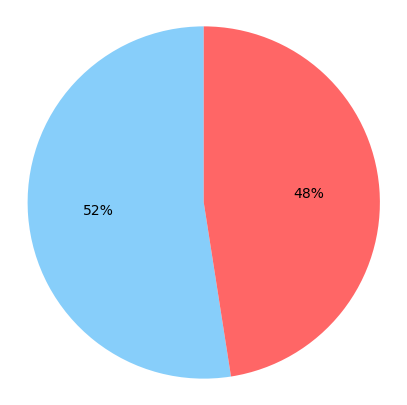

In [16]:
sex_counts = df["Sex"].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 5))
plt.pie(
    sex_counts,

    autopct='%1.0f%%',
    startangle=90,
    colors=['#87CEFA', '#FF6666']
)
plt.axis('equal')

plt.show()

##### Wnioski:
- #####  Różnica między płciami wynosi tylko 5%, co oznacza, że próbka jest dobrze zbalansowana i reprezentatywna.

---

In [17]:
print(sex_counts)
print(type(sex_counts.index))
print(sex_counts.index.tolist())


Sex
Female    52.472597
Male      47.527403
Name: proportion, dtype: float64
<class 'pandas.core.indexes.base.Index'>
['Female', 'Male']


#### 2) Wykres kołowy: Podział badanej populacji z chorobami serca ze względu na płeć

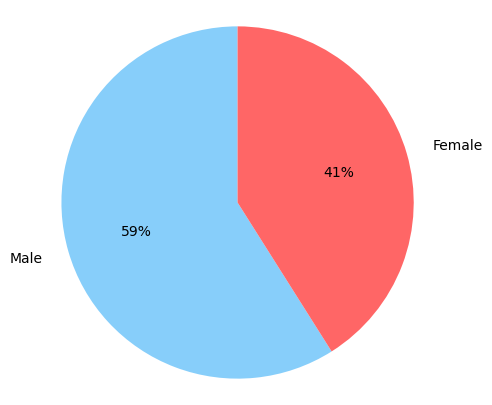

In [18]:
heart_df = df[df['HeartDisease'] == 'Yes']

sex_counts = heart_df['Sex'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    sex_counts,
    labels=sex_counts.index,
    autopct='%1.0f%%',
    startangle=90,
    colors=['#87CEFA', '#FF6666'],
    labeldistance=1.15
)
plt.axis('equal')

plt.show()


##### Wnioski:
- ##### 59% osób z chorobami serca to mężczyźni, a 41% to kobiety.
- ##### mężczyźni chorują częściej niż wynikałoby to tylko z ich udziału w populacji.

---

#### 3) Wykres kołowy: Porównanie liczby osób z chorobami serca i bez nich

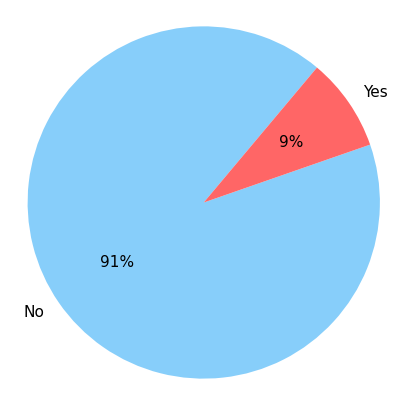

In [19]:
heart_disease_counts = df.groupby("HeartDisease").size().reset_index(name="Count")

labels = heart_disease_counts["HeartDisease"]
sizes = heart_disease_counts["Count"]

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.0f%%',
    startangle=50,
    colors=['#87CEFA', '#FF6666'],
    textprops={'color': 'black', 'fontsize': 11}
)
plt.axis('equal')

plt.show()


##### Wnioski:
- #####  Lekko ponad 8,50% badanej populacji ma zdiagnozowaną chorobę serca, gdzie prawie 91.5% takiej nie posiada.

---

#### 4)  wykres liniowy: Liczba obserwacji występowania chorób serca w badanej populacji w rożnych grupach wiekowych z podziałem na płeć

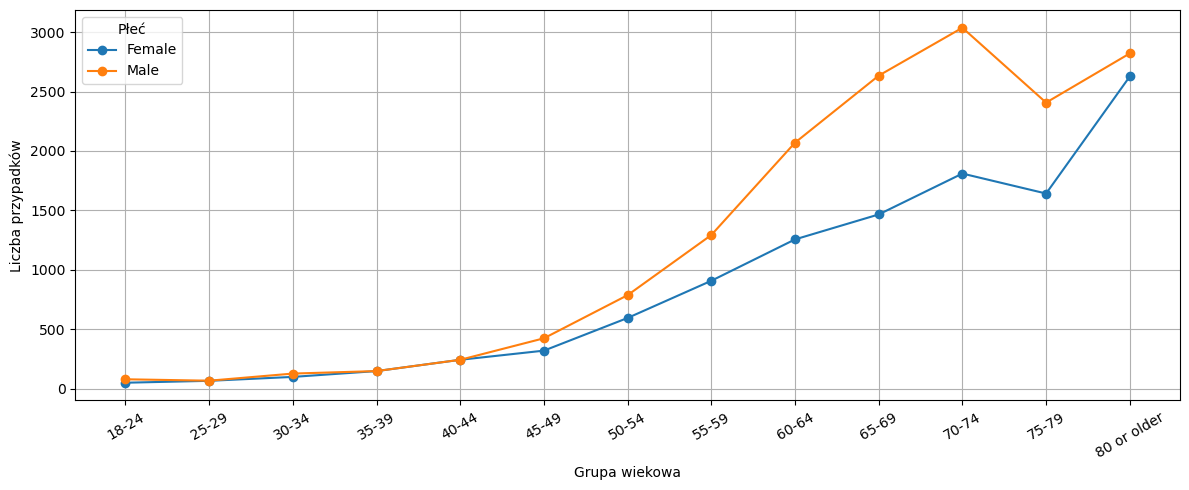

In [20]:
heart_disease_data = df[df["HeartDisease"] == "Yes"]

age_sex_counts = heart_disease_data.groupby(["AgeCategory", "Sex"]).size().reset_index(name="Count")

pivot_df = age_sex_counts.pivot(index="AgeCategory", columns="Sex", values="Count").fillna(0)

plt.figure(figsize=(12, 5))
for sex in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[sex], marker='o', label=sex)

plt.xlabel("Grupa wiekowa")
plt.ylabel("Liczba przypadków")
plt.xticks(rotation=30)
plt.legend(title="Płeć")
plt.grid(True)
plt.tight_layout()

plt.show()


##### Wnioski:
- ##### Mężczyźni częściej chorują na choroby serca niż kobiety w każdej grupie wiekowej.
- ##### Różnica ta pogłębia się po 50 roku życia, kiedy liczba przypadków wśród mężczyzn rośnie znacznie szybciej niż u kobiet.
- ##### W grupie wiekowej 75-79 lat widoczny jest spadek liczby przypadków u kobiet, jednak po 80 roku życia ponownie wzrasta, co może sugerować, że kobiety żyją dłużej, ale w starszym wieku ich ryzyko zachorowania również rośnie.

---

#### 5) Wykres słupkowy: Rozkład procentowy różnych kategorii BMI wśród osób z chorobą serca

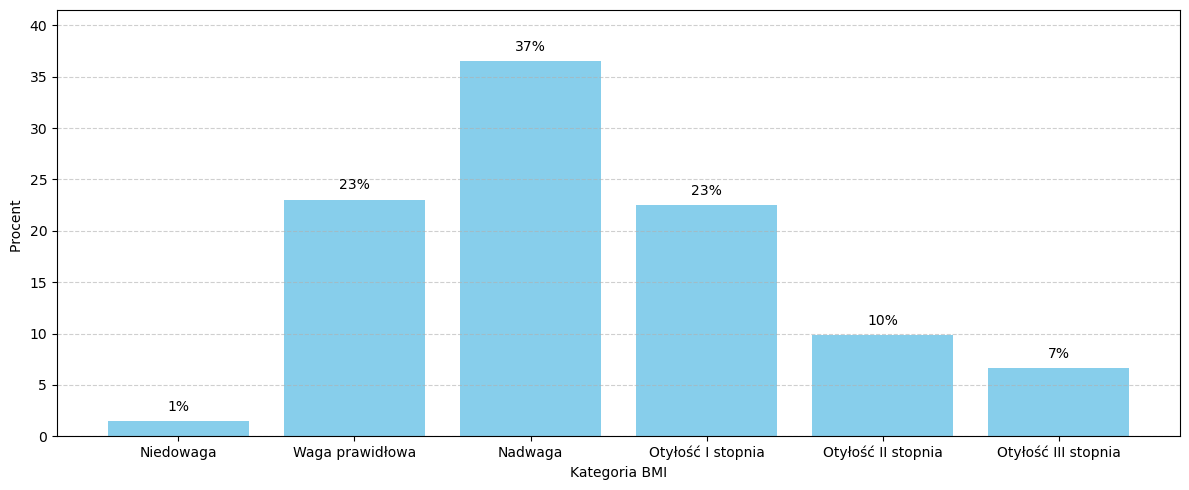

In [21]:
heart_df = df[df["HeartDisease"] == "Yes"].copy()

def bmi_category(bmi):
    if bmi < 18.5:
        return "Niedowaga"
    elif bmi < 25:
        return "Waga prawidłowa"
    elif bmi < 30:
        return "Nadwaga"
    elif bmi < 35:
        return "Otyłość I stopnia"
    elif bmi < 40:
        return "Otyłość II stopnia"
    else:
        return "Otyłość III stopnia"

heart_df["BMI_Category"] = heart_df["BMI"].apply(bmi_category)

counts = heart_df["BMI_Category"].value_counts(normalize=True).reindex([
    "Niedowaga", "Waga prawidłowa", "Nadwaga", "Otyłość I stopnia", "Otyłość II stopnia", "Otyłość III stopnia"
], fill_value=0) * 100

plt.figure(figsize=(12, 5))
bars = plt.bar(counts.index, counts.values, color='skyblue')

for i in range(len(bars)):
    bar = bars[i]
    val = counts.values[i]

    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height() + 1
    label = str(int(round(val))) + '%'

    plt.text(x, y, label, ha='center')

plt.ylabel("Procent ")
plt.xlabel("Kategoria BMI")
plt.ylim(0, max(counts.values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### Wnioski:
- ##### Osoby z wagą prawidłową i niedowagą stanowią mały odsetek wśród chorych na serce, niecałe 25%
- ##### Większość przypadków chorób serca dotyczy osób z nadwagą i otyłością, ponad 75%

---

#### 6) Wykres słupkowy: Procentowy podział liczby osób z chorobą serca na palących i niepalących

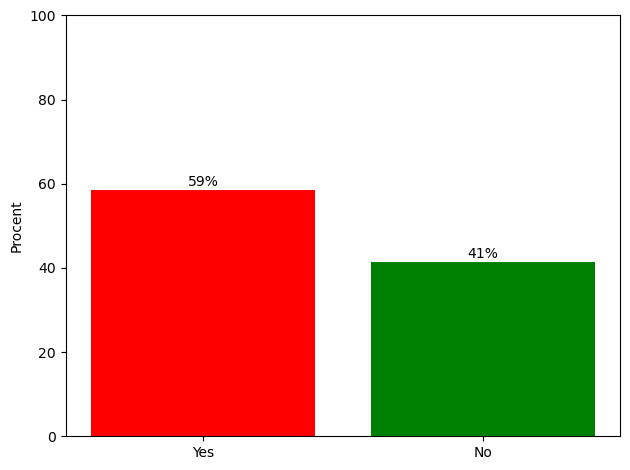

In [22]:
heart_df = df[df["HeartDisease"] == "Yes"].copy()

smoking_counts = heart_df["Smoking"].value_counts(normalize=True).reindex(["Yes", "No"], fill_value=0) * 100

bars = plt.bar(smoking_counts.index.tolist(), smoking_counts.values.tolist(), color=["red", "green"])


for i in range(len(bars)):
    bar = bars[i]
    val = smoking_counts.values[i]

    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height() + 1

    plt.text(x, y, f"{val:.0f}%", ha='center', color='black')

plt.ylabel("Procent")
plt.ylim(0, 100)
plt.tight_layout()

plt.show()

##### Wnioski:
- ##### Palacze stanowią większość wśród osób z chorobą serca, ponad 58.5% co wskazuje na powiązanie pomiędzy występowaniem chorób serca a aktywnym paleniem papierosów.
- ##### Osoby niepalące również chorują na serce ale w miejszym stopniu, poniżej 41.5%

---

## Podsumowanie i wnioski

#### Styl życia odgrywa kluczową rolę w prewencji potencjalnych chorób serca. Ograniczenie palenia, regularna aktywność fizyczna oraz utrzymanie prawidłowej masy ciała mogą znacząco zmniejszyć ryzyko tych schorzeń. Wraz z rosnącym wiekiem organizm staje się bardziej podatny na choroby serca, dlatego profilaktyka staje się kluczowa.
#### Osoby z nadwagą i otyłością stanowią ponad 75% chorych na serce, co wskazuje na silny związek między BMI a ryzykiem wystąpienia choroby sercowo-naczyniowej. Palenie również okazuje się istotnym czynnikiem ryzyka, ponieważ palacze dominują wśród chorych (ponad 58%), podkreślając negatywny wpływ tego nawyku na serce.
#### Dodatkowo, mężczyźni częściej chorują na serce niż kobiety, mimo że rozkład płci w całej populacji jest zbliżony. Ryzyko wzrasta wraz z wiekiem, co wskazuje na potrzebę częstszych badań profilaktycznych, szczególnie u osób starszych.
#### Podsumowując, utrzymanie prawidłowej masy ciała, unikanie palenia oraz regularna aktywność fizyczna to kluczowe elementy, które mogą znacząco zmniejszyć ryzyko chorób serca i poprawić jakość życia.
